# Arithmetic Trees Generator

In [2]:
'''arithmetic trees generators
can output  nltk trees or array  representation'''


import torch
import numpy as np
import os
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from torch.nn import CrossEntropyLoss

from torch.masked import masked_tensor, as_masked_tensor
import math
from copy import deepcopy
import torch.nn as nn
def set_seed(seed):
    """ Set all seeds to make results reproducible """
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

from random import seed
from random import randint
from numpy import array
from math import ceil
from math import log10
from math import sqrt
from numpy import argmax
from math import floor

'''Binary trees'''
import numpy as np
class Tree(object):
        def __init__(self, entry, left=None, right=None):
            self.entry = entry
            self.left = left
            self.right = right
        def get_entry(self):
            return self.entry
        def get_left(self):
            return self.left
        def get_right(self):
            return self.right
        def __repr__(self):
            args = repr(self.entry)
            if self.left or self.right:
                args += ', {0}, {1}'.format(repr(self.left), repr(self.right))
            return 'Tree({0})'.format(args)
           
        def depth(self):
            if self.left == self.right == None:
                return 0
            elif (self.left !=None)&(self.right !=None):
                left_depth = self.left.depth()
                right_depth = self.right.depth()
                return max(left_depth+1,right_depth+1)
        def leaves(self):
            if self.left == self.right == None:
                return [self.entry]
            return self.left.leaves()+self.right.leaves()
        def width(self):
            return len(self.leaves())
        def formula(self):
            form = list(str(self.entry))
            if self.left or self.right:
                form = form + self.right.formula()+[')']
                form = ['('] +self.left.formula() + form
            return form
        def get_nodes(self):  #in the same order as they appear in the formula
            form = list(str(self.entry))
            if self.left or self.right:
                form = form + self.right.get_nodes()
                form = self.left.get_nodes() + form
            return form
        def adj_dim(self):
            return len(self.get_nodes())
        def absisse_of_left_one(self):
            if self.left == None:
                return 0
            else:
                if self.left.left == None:
                    return 0
                else:
                    return self.left.left.adj_dim()
        def absisse_of_right_one(self):
            if self.right == None:
                return 0
            else:
                if self.right.left == None:
                    return 0
                else:
                    return self.right.left.adj_dim()

        def graph(self):
            nodes = self.get_nodes()
            dim = self.adj_dim()
            if dim == 1:
                return nodes, np.zeros((1,1))
            left_dim = self.left.adj_dim()
            right_dim = self.right.adj_dim()
            diag_left = self.left.graph()[1]
            diag_right = self.right.graph()[1]
            haut = np.concatenate((diag_left,np.zeros((left_dim,dim-left_dim))),axis=1)
            bas = np.concatenate((np.zeros((right_dim,dim-right_dim)),diag_right),axis=1)
            i_left = self.absisse_of_left_one()
            i_right = self.absisse_of_right_one()
            haut[i_left,left_dim] = 1
            bas[i_right, left_dim] = 1
            adj = np. concatenate((haut, np.zeros((1,dim)), bas),axis=0)
            return nodes, adj

        def to_array(self, N, variables, connectors, x=1, a=None, b=None, d=0):  #N = len(array) ; x keeps trace of the horizontal position in the array
                                                                            #d of the depth; a is the array for the leaves, b for the rest of the nodes (connectors)
            if N<2**(self.depth()+1)-1:
                raise Exception("Too short array for such tree")
            else:
                if a is None:
                    a = np.full(N,np.nan)
                if b is None:
                    b = np.full(N,np.nan)
                dic_con = dict(zip(connectors,np.arange(len(connectors))))
                idx = 2**(d)+x-2
                if (self.right == None)&(self.left==None):   #we suppose the leaves are variables and the other nodes are connectors
                    a[idx] = int(self.entry)
                    return a,b
                else:
                    b[idx] = dic_con[self.entry]
                    x = 2*(x-1)+1
                    r = x+1
                    d+=1
                    self.left.to_array(N, variables,connectors, x, a, b, d)
                    self.right.to_array(N, variables, connectors, r, a, b, d)
                    return a,b
            
        def to_array_parse(self, N, variables, connectors, x=1, a=None, b=None, d=0):  #N = len(array) ; x keeps trace of the horizontal position in the array
                                                                            #d of the depth; a is the array for the leaves, b for the rest of the nodes (connectors)
            if N<2**(self.depth()+1)-1:
                raise Exception("Too short array for such tree")
            else:
                if a is None:
                    a = np.full(N,np.nan)
                if b is None:
                    b = np.full(N,np.nan)
                dic_con = {'l':0,'r':1}
                leaves = connectors + variables
                dic_leaves = dict(zip(leaves,np.arange(len(leaves))))
                idx = 2**(d)+x-2
                if (self.right == None)&(self.left==None):   #we suppose the leaves are variables and the other nodes are connectors
                    a[idx] = int(dic_leaves[self.entry])
                    return a,b
                else:
                    
                    b[idx] = int(dic_con[self.entry])
                    x = 2*(x-1)+1
                    r = x+1
                    d+=1
                    self.left.to_array_parse(N, variables,connectors, x, a, b, d)
                    self.right.to_array_parse(N, variables, connectors, r, a, b, d)
                    return a,b

       # def to_list(self,idx=1, a=[], d=0):  #N = len(array) ; idx keeps trace of the position in the array
        #    if (self.right == None)&(self.left==None):
         #       a.append(int(self.entry))
          #      return a
           # else:
            #   idx = idx+2**d
             #   idr = idx+1
              #  d+=1
               # self.left.to_array(N, idx, a, d)
                #self.right.to_array(N, idr, a, d)



import random
def tree_generator(variables, connectors, max_depth):
    if max_depth == 0:
        return Tree(random.choice(variables))
    else:
        left_depth = random.randint(0,max_depth-1)
        right_depth = random.randint(0,max_depth-1)
        return Tree(random.choice(connectors),tree_generator(variables, connectors, left_depth),tree_generator(variables, connectors, left_depth))

class ArithmeticTree(Tree):
    def __init__(self, entry, left=None, right=None):
        super().__init__(entry, left, right)
    def eval(self):
        if self.left == None:
            return int(self.entry)
        else:
            if self.entry == '+':
                return self.left.eval() + self.right.eval()
            if self.entry == '*':
                return self.left.eval() * self.right.eval()
            if self.entry == '-':
                return self.left.eval() - self.right.eval()

def arithmetic_tree_generator(variables, connectors, max_depth):
    if max_depth == 0:
        return ArithmeticTree(random.choice(variables))
    else:
        left_depth = random.randint(0,max_depth-1)
        right_depth = random.randint(0,max_depth-1)
        return ArithmeticTree(random.choice(connectors),arithmetic_tree_generator(variables, connectors, left_depth),arithmetic_tree_generator(variables, connectors, left_depth))

'''from arithmetic tree to parse tree'''
def translate_Tree(arith_tree):
    root = arith_tree.get_entry()
    if isinstance(root, str):
        root = ArithmeticTree(root)
    if arith_tree.get_left()==None:
        return arith_tree
    else:
        left = arith_tree.get_left()
        right = arith_tree.get_right()
        new_left = translate_Tree(left)
        new_right = translate_Tree(right)
        return Tree('r',Tree('l',left=new_left,right=root), new_right)
        
    
import networkx as nx
def arith_data_gen(variables,connectors, max_depth, n_samples, array=False):
    data_set = []
    for i in range(n_samples):
        tree = arithmetic_tree_generator(variables, connectors, max_depth)
        if array == False:
            graph = tree.graph()
            nodes = graph[0]
            adj_mat = graph[1]
            y = torch.tensor(tree.eval())
            net_graph = nx.from_numpy_array(adj_mat,  create_using=nx.DiGraph)
            dic_nodes = dict(zip(list(range(tree.adj_dim())), nodes))
            nx.set_node_attributes(net_graph,dic_nodes,'label')
            #net_graph.graph['y'] = y
            data_set.append((net_graph,y))
        else:
            N = 2**(max_depth +1)-1
            arr = tree.to_array(N, variables, connectors)
            y = torch.tensor(tree.eval())
            data_set.append((arr,y))
    return data_set
def arith_data_gen_parse(variables,connectors, max_depth, n_samples):
    data_set = []
    for i in range(n_samples):
        tree = arithmetic_tree_generator(variables, connectors, max_depth)
        treet = translate_Tree(tree)
        N = 2**(2*max_depth +1)-1
        arr = treet.to_array_parse(N, variables, connectors)
        y = torch.tensor(tree.eval())
        data_set.append((arr,y))
    return data_set

class One_Hot_nodes(object):
    def __init__(self, variables,connectors):
        self.l = len(variables+connectors)
        self.map = dict(zip(variables+connectors,range(self.l)))

    def __call__(self,liste):
        self.enc = np.zeros((len(liste),self.l))
        for i, node in enumerate(liste):
            try :
                self.enc[i, self.map[int(node)]] = 1
            except :
                self.enc[i, self.map[node]] = 1
        return torch.from_numpy(self.enc)

class One_Hot_Zp(object):
    def __init__(self, p):
        self.p = p               
        
    def __call__(self,tensor):  #one hot encode the leaves array in Zp
        tt=torch.remainder(tensor[0,:],self.p).repeat(self.p,1)
        for i in range(tt.shape[1]):
            if ~torch.isnan(tt[0,i]):
                j = int(tt[0,i])
                tt[:,i] = 0
                tt[j,i] = 1
        return tt,tensor[1,:]

class target_Zp(object):
    def __init__(self,p):
        self.p = p
    def __call__(self,tensor):
        return torch.remainder(tensor,self.p)

class mod_target_Zp(object):
    def __init__(self,p,connectors):
        self.p = p
        self.move = len(connectors)
    def __call__(self,tensor):
        return torch.remainder(tensor+self.move,self.p)


class target_One_Hot_Zp(object):
    def __init__(self, p):
        self.p = p

    def __call__(self,tensor):  #one hot encode the leaves array in Zp
        tt=torch.remainder(tensor,self.p).repeat(self.p)
        j = int(tt[0])
        tt[:] = 0
        tt[j] = 1
        return tt                     

In [ ]:
'''Dataset class implementation'''
from torch.utils.data import Dataset
from torch_geometric.utils.convert import to_networkx, from_networkx
class CD_TreeG(Dataset):
    def __init__(self, net_data, max_depth, transform=None, target_transform=None):
        self.net_data = net_data
        self.max_depth = max_depth
        self.transform = transform
        self.target_transform = target_transform
    def __len__(self):
        return len(self.net_data)

    def __getitem__(self, idx):
        if isinstance(idx, int):
            if idx < 0 : #Handle negative indices
                idx += len( self )
            else:
                X = torch.tensor(self.net_data[idx][0])
                y = self.net_data[idx][1]
                if self.transform:
                    X = self.transform(X)
                if self.target_transform:
                    y = self.target_transform(y)

            return X, y
        elif isinstance(idx, slice ) :
            #Get the start, stop, and step from the slice
            return [self[ii] for ii in range(*idx.indices(len(self)))]

In [3]:
# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout


def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    pos = graphviz_layout(G, prog="dot")
    nx.draw_networkx(G, pos=pos, with_labels=True, labels= G.nodes,
                     node_color=color, cmap="Set2")
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

In [ ]:
max_depth = 4
p=3
variables = list(np.arange(10))
connectors = ['*']
net_graph = arith_data_gen(variables, connectors, max_depth=4, n_samples =10)
visualize_graph(net_graph[3][0],'white')

# First model - Stochastic Matrices Through Loss Penalization

$loss = crossentropy(pred, labels) + \sum{(\sum_u{M^u} - 1)^2}$

In [ ]:
'''M is a stochastic matrix that is learned (only one connector)'''
class LearnTree(torch.nn.Module):
    def __init__(self,p):
        super().__init__()
        self.p = p
        self.M = torch.nn.Parameter(data=torch.full((self.p,self.p,self.p),1/self.p))


    def forward(self, tup_tens):
        tup = deepcopy(tup_tens)
        arr_leaves = tup[0]
        arr_conn = tup[1]
        while torch.sum(1-(arr_leaves[0,:].isnan()*1))!= 1: #loop as long as we have more than one leaf

            #print((1-(arr_leaves[0,:].isnan()*1)))
            last_leaf_id = max((1-(arr_leaves[0,:].isnan()*1)).nonzero())  #just an argmax that returns the max argument...
            #print('lastleafid:',last_leaf_id)
            d = floor(math.log2(last_leaf_id+1))   # get the depth of the leaf
            #print('d',d)
            x = last_leaf_id+2-2**d                   # get the horizontal pos
            #print('x:',x)
            conn_id = int(2**(d-1) + (x/2)-2)           # get the index of the corresponding connector
            #print('conn_id',conn_id)
            left = arr_leaves[:,last_leaf_id-1].squeeze().float()
            right = arr_leaves[:,last_leaf_id].squeeze().float()
            conn = arr_conn[conn_id]             #will be used when several connectors

            prop = torch.einsum('i,uij,j->u',left,self.M,right) #one step of the propagation
            #print('arr_leaves before update', arr_leaves)
            #print('arr_conn before update', arr_conn)
            arr_leaves[:,last_leaf_id-1] = float('nan')
            arr_leaves[:,last_leaf_id] = float('nan')
            arr_conn[conn_id] = float('nan')
            arr_leaves[:,conn_id] = prop
            #print('arr_leaves after update', arr_leaves)
            #print('arr_conn after update', arr_conn)
        last_leaf_id = max((~arr_leaves[0,:].isnan().long()+2).nonzero())
        #print(self.M)
        return arr_leaves[:,last_leaf_id], self.M

In [ ]:
'''1000 samples of depth at most 4 and one connector'''
max_depth = 4
p=3
variables = list(np.arange(10))
connectors = ['*']
net_data = arith_data_gen(variables, connectors, max_depth=4, n_samples =1000,array=True)
l = len(net_data)
l_train =round(.8*l)
net_train = net_data[:l_train]
net_val = net_data[l_train:]
data_train = CD_TreeG(net_train, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
data_val = CD_TreeG(net_val, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
train_loader = data_train
val_loader =data_val
#train_loader = DataLoader(data_train, shuffle=True, batch_size=1)  #as I have no plan to implement batches, this could be a bit of overkill
#val_loader = DataLoader(data_val, shuffle=True, batch_size=1)

In [ ]:
'''train function'''
#the loss needs to add a penalty to (1-\sum_u {M_u})**2 for each i, j. To keep it stochastic
from torch.nn import CrossEntropyLoss
criterion = CrossEntropyLoss()
lr=10**(-3)                                                    #who knows?
#opti = optim.Adam(net1.parameters(), lr=lr, weight_decay=1e-4) #because why not?

#device = torch.device("cuda:2")
device =torch.device("cpu")
def train(net, criterion, opti, lr, train_loader, val_loader, epochs,device=device):

    best_loss = np.Inf
    best_train_loss = np.Inf
    rl_prec = np.Inf
    best_ep = 1
    nb_iterations = len(train_loader)
    print_every = nb_iterations // 5  # print the training loss 5 times per epoch
    iters = []
    train_losses = []
    val_losses = []


    for ep in range(epochs):

        net.train()
        running_loss = 0.0
        for it, (tup_tens, labels) in enumerate(train_loader):
            opti.zero_grad()
            # Converting to cuda tensors
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)

            # logits from the model
            out = net(tup_tens)
            logits = out[0]

            #param from the model
            M = out[1]

            # Computing loss

            loss = criterion(logits.squeeze(-1), labels) + torch.sum((torch.sum(M,0) - 1)**2)   #coef? Other expression? Should we fear negative coef?
            train_losses.append(loss)
            loss.backward()
            opti.step()

            running_loss += loss.item()

            if (it + 1) % print_every == 0:  # Print training loss information
                print()
                print("Iteration {}/{} of epoch {} complete. Loss : {} "
                      .format(it+1, nb_iterations, ep+1, running_loss / print_every))

                if (val_losses==[]) & (rl_prec>running_loss):
                    net_copy = deepcopy(net)
                    path_to_model='LearnTree.pt'.format(net.__class__.__name__) #save more often for the server disconnections
                    torch.save(net_copy.state_dict(), path_to_model)
                    print("The model has been saved in {}".format(path_to_model))
                rl_prec = running_loss
                running_loss = 0.0

        val_loss = eval_loss(net, device, criterion, val_loader)  # Compute validation loss
        acc = accuracy(net, device, val_loader)
        print()
        print("Epoch {} complete! Validation Loss : {}".format(ep+1, val_loss))
        print("Accuracy : {}".format(acc))
        val_losses.append(val_loss)
        if val_loss < best_loss:
            print("Best validation loss improved from {} to {}".format(best_loss, val_loss))
            print()
            net_copy = deepcopy(net)  # save a copy of the model
            best_loss = val_loss
            best_ep = ep + 1



def eval_loss(net, device, criterion, dataloader):
    net.eval()

    mean_loss = 0
    count = 0

    with torch.no_grad():
        for it, (tup_tens, labels) in enumerate(dataloader):
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)
            out = net(tup_tens)
            logits = out[0]
            M = out[1]
            mean_loss += criterion(logits.squeeze(-1), labels) + torch.sum((torch.sum(M,0) - 1)**2)
            count += 1

    return mean_loss / count

def accuracy(net, device, dataloader):
    net.eval()

    right = 0
    count = 0

    with torch.no_grad():
        for it, (tup_tens, labels) in enumerate(dataloader):
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)
            out = net(tup_tens)
            logits = out[0]
            M = out[1].detach()
            pred = torch.argmax(logits)

            right += int(pred==labels)               #number of correct predictions
            count += 1

    return right / count

In [ ]:
net1 = LearnTree(3).to(device)
opti = optim.SGD(net1.parameters(), lr=lr)

epochs=10
train(net1, criterion, opti, lr, train_loader, val_loader, epochs,device=device)

issue with proba that go out of [0,1]

# URN Model - A Strict Subclass

Learn orthogonal matrices instead of stochastic matrices

In [1]:

'''p is a natural number and we want to find the $p^3$ matrix that defines a binary fuction/relation'''
from torch.nn import Embedding
class LearnTreeURN(torch.nn.Module):
    def __init__(self,p):
        super().__init__()
        self.p = p
        self.dim_emb = int(p*(p-1)/2)
        self.preM = torch.nn.Parameter(data=torch.full((self.dim_emb, self.p),1/self.p)) # what better initialization?

         # for creating the upper tringulars
        self.ix_mat = torch.zeros(p,p).long()
        for i in range(0,p):
            for j in range(i+1,p):
                self.ix_mat[i,j] = (i* (2*p - i - 3))//2 + j - 1 + 1



    def forward(self, tup_tens):
        tup = deepcopy(tup_tens)
        arr_leaves = tup[0]
        arr_conn = tup[1]
        list_ortho = []
        for i in range(self.p):
            x = self.preM[:,i]
            #print(x.shape)
            x = torch.cat([torch.zeros(x.shape[:-1]).to(device).unsqueeze(-1), x], dim=-1)
            tri = torch.index_select(x, -1, self.ix_mat.flatten()).reshape([self.p,self.p])
            tri = tri - tri.transpose(-2, -1)
            exp_mat = torch.matrix_exp(tri)
            list_ortho.append(exp_mat)
        U = torch.stack(list_ortho)  #first we create the ortho mat corresponding to M
        U = torch.transpose(U,0,1)   # we need to have distributions along dim0
        M = U*U
        while torch.sum(1-(arr_leaves[0,:].isnan()*1))!= 1: #loop as long as we have more than one leaf

            #print((1-(arr_leaves[0,:].isnan()*1)))
            last_leaf_id = max((1-(arr_leaves[0,:].isnan()*1)).nonzero())  #just an argmax that returns the max argument...
            #print('lastleafid:',last_leaf_id)
            d = floor(math.log2(last_leaf_id+1))   # get the depth of the leaf
            #print('d',d)
            x = last_leaf_id+2-2**d                   # get the horizontal pos
            #print('x:',x)
            conn_id = int(2**(d-1) + (x/2)-2)           # get the index of the corresponding connector
            #print('conn_id',conn_id)
            left = arr_leaves[:,last_leaf_id-1].squeeze().float()
            right = arr_leaves[:,last_leaf_id].squeeze().float()
            conn = arr_conn[conn_id]             #will be used when several connectors

            prop = torch.einsum('i,uij,j->u',left,M,right) #one step of the propagation
            #print('arr_leaves before update', arr_leaves)
            #print('arr_conn before update', arr_conn)
            arr_leaves[:,last_leaf_id-1] = float('nan')
            arr_leaves[:,last_leaf_id] = float('nan')
            arr_conn[conn_id] = float('nan')
            arr_leaves[:,conn_id] = prop
            #print('arr_leaves after update', arr_leaves)
            #print('arr_conn after update', arr_conn)
        last_leaf_id = max((~arr_leaves[0,:].isnan().long()+2).nonzero())
        #print(M)
        return arr_leaves[:,last_leaf_id], M

NameError: name 'torch' is not defined

In [ ]:
max_depth = 4
p=3
variables = list(np.arange(10))
connectors = ['*']
net_data = arith_data_gen(variables, connectors, max_depth=4, n_samples =1000,array=True)
l = len(net_data)
l_train =round(.8*l)
net_train = net_data[:l_train]
net_val = net_data[l_train:]
data_train = CD_TreeG(net_train, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
data_val = CD_TreeG(net_val, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
train_loader = data_train
val_loader =data_val
#train_loader = DataLoader(data_train, shuffle=True, batch_size=1)  #as I have no plan to implement batches, this could be a bit of overkill
#val_loader = DataLoader(data_val, shuffle=True, batch_size=1)

#the loss needs to add a penalty to (1-\sum_u {M_u})**2 for each i, j. To keep it stochastic
from torch.nn import CrossEntropyLoss
criterion = CrossEntropyLoss()
lr=10**(-2)                                                    #who knows?
#opti = optim.Adam(net1.parameters(), lr=lr, weight_decay=1e-4) #because why not?

#device = torch.device("cuda:2")
device =torch.device("cpu")
def train(net, criterion, opti, lr, train_loader, val_loader, epochs,device=device):

    best_loss = np.Inf
    best_train_loss = np.Inf
    rl_prec = np.Inf
    best_ep = 1
    nb_iterations = len(train_loader)
    print_every = nb_iterations // 5  # print the training loss 5 times per epoch
    iters = []
    train_losses = []
    val_losses = []


    for ep in range(epochs):

        net.train()
        running_loss = 0.0
        for it, (tup_tens, labels) in enumerate(train_loader):
            opti.zero_grad()
            # Converting to cuda tensors
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)

            # logits from the model
            out = net(tup_tens)
            logits = out[0]

            #param from the model
            M = out[1]

            # Computing loss

            loss = criterion(logits.squeeze(-1), labels)    #better!
            train_losses.append(loss)
            loss.backward()
            opti.step()
            running_loss += loss.item()

            if (it + 1) % print_every == 0:  # Print training loss information
                print()
                print("Iteration {}/{} of epoch {} complete. Loss : {} "
                      .format(it+1, nb_iterations, ep+1, running_loss / print_every))

                if (val_losses==[]) & (rl_prec>running_loss):
                    net_copy = deepcopy(net)
                    path_to_model='LearnTree.pt'.format(net.__class__.__name__) #save more often for the server disconnections
                    torch.save(net_copy.state_dict(), path_to_model)
                    print("The model has been saved in {}".format(path_to_model))
                rl_prec = running_loss
                running_loss = 0.0


        val_loss = eval_loss(net, device, criterion, val_loader)  # Compute validation loss
        acc = accuracy(net, device, val_loader)
        print()
        print("Epoch {} complete! Validation Loss : {}".format(ep+1, val_loss))
        print("Accuracy : {}".format(acc))
        val_losses.append(val_loss)
        if val_loss < best_loss:
            print("Best validation loss improved from {} to {}".format(best_loss, val_loss))
            print()
            net_copy = deepcopy(net)  # save a copy of the model
            best_loss = val_loss
            best_ep = ep + 1


    

def eval_loss(net, device, criterion, dataloader):
    net.eval()

    mean_loss = 0
    count = 0

    with torch.no_grad():
        for it, (tup_tens, labels) in enumerate(dataloader):
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)
            out = net(tup_tens)
            logits = out[0]
            M = out[1]
            mean_loss += criterion(logits.squeeze(-1), labels) 
            count += 1

    return mean_loss / count

def accuracy(net, device, dataloader):
    net.eval()

    right = 0
    count = 0

    with torch.no_grad():
        for it, (tup_tens, labels) in enumerate(dataloader):
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)
            out = net(tup_tens)
            logits = out[0]
            M = out[1].detach()
            pred = torch.argmax(logits)

            right += int(pred==labels)               #number of correct predictions
            count += 1

    return right / count

In [ ]:
net2 = LearnTreeURN(3).to(device)
opti = optim.SGD(net2.parameters(), lr=lr)

epochs=10
train(net2, criterion, opti, lr, train_loader, val_loader, epochs,device=device)
            

The 2 last matrices are what we expect, but in the first he does not learn that $0*i=0$. With orth mat, we are imposing that the sum by row should be one. Which is obviously wrong

# Information passing and reversibility

Multiplication on N+ is reversible in the sense that if you have a and the product of a and b you can find b. But on $Z_p$ it is no more! The 0[p] 'absorbs' information. And the smallest p the more 0s. In some way, this explains why unitary matrices are of no help. They can't learn the line and the row of 1 corresponding to $0*i=0$ and $j*0=0$.
How not to make the parallel with microscopic rules being irreversible in quantum meca, while macros are not...

In [ ]:
nonzero = 0
for data in (enumerate(data_train)):
    if data[1][1].item()!=0:
        nonzero+=1
nonzero

that is the number of non zero trees in modulo3 among the 800 elements of data_train.
The deeper the trees, the smallest will be the ratio of non zeros ones.

# Clip Some Weights To 0 And 1

Create 2 class functions that freeze some of the weights to 0 or to 1 when they come close enough. Provided that the lr is small enough, this should work

In [ ]:
'''hypothesis: if some weights come too close to 0... they are 0'''
class weightConstraint0(object):
    def __init__(self,p):
        self.p = p
    
    def __call__(self,module):
        if hasattr(module,'parameters'):
            for param in module.parameters():
                w = param.data
                grad = param.grad.data
                mask = w<1/self.p**2
                param.data = torch.where(mask,0,w)
                param.grad.data = torch.where(mask,0,grad) 

In [ ]:
class weightConstraint1(object):
    def __init__(self,p):
        self.p = p
    
    def __call__(self,module):
        if hasattr(module,'parameters'):
            for param in module.parameters():
                w = param.data
                grad = param.grad.data
                mask = w>1-1/self.p**2
                param.data = torch.where(mask,1,w)
                param.grad.data = torch.where(mask,0,grad) 

In [ ]:
def train_clip(net, criterion, opti, lr, train_loader, val_loader, epochs,p, device=device):

    best_loss = np.Inf
    best_train_loss = np.Inf
    rl_prec = np.Inf
    best_ep = 1
    nb_iterations = len(train_loader)
    print_every = nb_iterations // 5  # print the training loss 5 times per epoch
    iters = []
    train_losses = []
    val_losses = []
    constraint0 = weightConstraint0(p)
    constraint1 = weightConstraint1(p)

    for ep in range(epochs):

        net.train()
        running_loss = 0.0
        for it, (tup_tens, labels) in enumerate(train_loader):
            opti.zero_grad()
            # Converting to cuda tensors
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)

            # logits from the model
            out = net(tup_tens)
            logits = out[0]

            #param from the model
            M = out[1]

            # Computing loss

            loss = criterion(logits.squeeze(-1), labels) + torch.sum((torch.sum(M,0) - 1)**2)   #coef? Other expression? Should we fear negative coef?
            train_losses.append(loss)
            loss.backward()
            net.apply(constraint0)
            net.apply(constraint1)
            opti.step()

            running_loss += loss.item()

            if (it + 1) % print_every == 0:  # Print training loss information
                print()
                print("Iteration {}/{} of epoch {} complete. Loss : {} "
                      .format(it+1, nb_iterations, ep+1, running_loss / print_every))

                #if (val_losses==[]) & (rl_prec>running_loss):
                 #   net_copy = deepcopy(net)
                  #  path_to_model='LearnTree.pt'.format(net.__class__.__name__) #save more often for the server disconnections
                   # torch.save(net_copy.state_dict(), path_to_model)
                    #print("The model has been saved in {}".format(path_to_model))
                rl_prec = running_loss
                running_loss = 0.0

        val_loss = eval_loss(net, device, criterion, val_loader)  # Compute validation loss
        acc = accuracy(net, device, val_loader)
        print()
        print("Epoch {} complete! Validation Loss : {}".format(ep+1, val_loss))
        print("Accuracy : {}".format(acc))
        print(M)
        val_losses.append(val_loss)
        if val_loss < best_loss:
            print("Best validation loss improved from {} to {}".format(best_loss, val_loss))
            print()
            net_copy = deepcopy(net)  # save a copy of the model
            best_loss = val_loss
            best_ep = ep + 1





In [ ]:
lr=10**(-2)
net3 = LearnTree(3).to(device)
opti = optim.SGD(net3.parameters(), lr=lr)

epochs=10
train_clip(net3, criterion, opti, lr, train_loader, val_loader, epochs,3,device=device)

In [ ]:
hasattr(net3,'parameters')

In [ ]:

for param in net3.parameters():
    param.grad.data

# It took 4 epochs to learn mult modulo3 with 800 samples and lr =10**(-2)

# Optimization

Bigger lr go faster... but too big will randomly clip some weights to 0 or 1. If gradients are small enough (again...) a magnitude order is $m = d(1/p,1/p^2)=\frac{p-1}{p^2}$. lr should be less than $m/(k*grad\_order)$ where k is th minimum number of opti step in the same direction (k=10 looks very safe) and grad_order is the magnitude order of the gradient. As a rule of thumb, we could make a first backward prop and take grad_order as the max absolute value of the first backprop.

this could be implemented


-> it seems that a Bayesian update rule instead of a naive gradient descent would be (in some way to define) optimal. But what do we know about the likelihood? Does it make sense to consider it a Bernoulli (and thus the posterior could be chosen the conjugate: a beta distribution).
-> M can be approached by p orthogonal matrices (implementation to do below). Interestingly it would make a proper subspace (all orthognal matrices, when squared element wise are stochastic while not all stochastic matrices can be mapped to orthogonal ones - 2 columns need not be orthogonal)

# Many connectors

In [ ]:
class LearnTreeMany(torch.nn.Module):
    def __init__(self,p,l):        #l is the number of connectors
        super().__init__()
        self.p = p
        self.M = nn.ParameterList([torch.nn.Parameter(data=torch.full((self.p,self.p,self.p),1/self.p)) for i in range(l)])
        

    def forward(self, tup_tens):
        tup = deepcopy(tup_tens)
        arr_leaves = tup[0]
        arr_conn = tup[1]
        while torch.sum(1-(arr_leaves[0,:].isnan()*1))!= 1: #loop as long as we have more than one leaf

            #print((1-(arr_leaves[0,:].isnan()*1)))
            last_leaf_id = max((1-(arr_leaves[0,:].isnan()*1)).nonzero())  #just an argmax that returns the max argument...
            #print('lastleafid:',last_leaf_id)
            d = floor(math.log2(last_leaf_id+1))   # get the depth of the leaf
            #print('d',d)
            x = last_leaf_id+2-2**d                   # get the horizontal pos
            #print('x:',x)
            conn_id = int(2**(d-1) + (x/2)-2)           # get the index of the corresponding connector
            #print('conn_id',conn_id)
            left = arr_leaves[:,last_leaf_id-1].squeeze().float()
            right = arr_leaves[:,last_leaf_id].squeeze().float()
            conn = int(arr_conn[conn_id].item())             #used now
            
            prop = torch.einsum('i,uij,j->u',left,self.M[conn],right) #one step of the propagation
            #print('arr_leaves before update', arr_leaves)
            #print('arr_conn before update', arr_conn)
            arr_leaves[:,last_leaf_id-1] = float('nan')
            arr_leaves[:,last_leaf_id] = float('nan')
            arr_conn[conn_id] = float('nan')
            arr_leaves[:,conn_id] = prop
            #print('arr_leaves after update', arr_leaves)
            #print('arr_conn after update', arr_conn)
        last_leaf_id = max((~arr_leaves[0,:].isnan().long()+2).nonzero())
        #print(self.M)
        return arr_leaves[:,last_leaf_id], self.M

we add additions

In [ ]:
max_depth = 4
p=3
variables = list(np.arange(10))
connectors = ['*','+']
net_data = arith_data_gen(variables, connectors, max_depth=4, n_samples =1000,array=True)
l = len(net_data)
l_train =round(.8*l)
net_train = net_data[:l_train]
net_val = net_data[l_train:]
data_train = CD_TreeG(net_train, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
data_val = CD_TreeG(net_val, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
train_loader = data_train
val_loader =data_val

In [ ]:
max_depth = 4
p=3
variables = list(np.arange(10))
connectors = ['*','+']
net_graph = arith_data_gen(variables, connectors, max_depth=4, n_samples =10)
visualize_graph(net_graph[3][0],'white')

In [ ]:
net4=LearnTreeMany(3,2)

In [ ]:
def train_clip_many(net, criterion, opti, lr, train_loader, val_loader, epochs,p, device=device):

    best_loss = np.Inf
    best_train_loss = np.Inf
    rl_prec = np.Inf
    best_ep = 1
    nb_iterations = len(train_loader)
    print_every = nb_iterations // 5  # print the training loss 5 times per epoch
    iters = []
    train_losses = []
    val_losses = []
    constraint0 = weightConstraint0(p)
    constraint1 = weightConstraint1(p)

    for ep in range(epochs):

        net.train()
        running_loss = 0.0
        for it, (tup_tens, labels) in enumerate(train_loader):
            opti.zero_grad()
            # Converting to cuda tensors
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)

            # logits from the model
            out = net(tup_tens)
            logits = out[0]

            #param from the model
            M = out[1]
            l=len(M)
            # Computing loss
            penalty=0
            for i in range(l):
                penalty+=torch.sum((torch.sum(M[i],0) - 1)**2)
            loss = criterion(logits.squeeze(-1), labels) + penalty   #coef? Other expression? Should we fear negative coef?
            #loss = criterion(logits.squeeze(-1), labels)
            train_losses.append(loss)
            loss.backward()
            net.apply(constraint0)
            net.apply(constraint1)
            opti.step()

            running_loss += loss.item()

            if (it + 1) % print_every == 0:  # Print training loss information
                print()
                print("Iteration {}/{} of epoch {} complete. Loss : {} "
                      .format(it+1, nb_iterations, ep+1, running_loss / print_every))

                #if (val_losses==[]) & (rl_prec>running_loss):
                 #   net_copy = deepcopy(net)
                  #  path_to_model='LearnTree.pt'.format(net.__class__.__name__) #save more often for the server disconnections
                   # torch.save(net_copy.state_dict(), path_to_model)
                    #print("The model has been saved in {}".format(path_to_model))
                rl_prec = running_loss
                running_loss = 0.0

        val_loss = eval_loss(net, device, criterion, val_loader)  # Compute validation loss
        acc = accuracy(net, device, val_loader)
        print()
        print("Epoch {} complete! Validation Loss : {}".format(ep+1, val_loss))
        print("Accuracy : {}".format(acc))
        print(M[0])
        print(M[1])
        val_losses.append(val_loss)
        if val_loss < best_loss:
            print("Best validation loss improved from {} to {}".format(best_loss, val_loss))
            print()
            net_copy = deepcopy(net)  # save a copy of the model
            best_loss = val_loss
            best_ep = ep + 1



def eval_loss(net, device, criterion, dataloader):
    net.eval()

    mean_loss = 0
    count = 0

    with torch.no_grad():
        for it, (tup_tens, labels) in enumerate(dataloader):
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)
            out = net(tup_tens)
            logits = out[0]
            #M = out[1]
            mean_loss += criterion(logits.squeeze(-1), labels) 
            count += 1

    return mean_loss / count

def accuracy(net, device, dataloader):
    net.eval()

    right = 0
    count = 0

    with torch.no_grad():
        for it, (tup_tens, labels) in enumerate(dataloader):
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)
            out = net(tup_tens)
            logits = out[0]
            
            pred = torch.argmax(logits)

            right += int(pred==labels)               #number of correct predictions
            count += 1

    return right / count

In [ ]:
'''hyp: if some weights come too close to 0... they are 0'''
class weightConstraint0(object):
    def __init__(self,p):
        self.p = p
    
    def __call__(self,module):
        if hasattr(module,'parameters'):
            for param in module.named_parameters():
                w = param[1].data
                if param[1].grad is not None:
                    grad = param[1].grad.data
                    mask = w<1/self.p**2
                    param[1].data = torch.where(mask,0,w)
                    param[1].grad.data = torch.where(mask,0,grad) 
                    

class weightConstraint1(object):
    def __init__(self,p):
        self.p = p
    
    def __call__(self,module):
        if hasattr(module,'parameters'):
            for param in module.named_parameters():
                w = param[1].data
                if param[1].grad is not None:
                    grad = param[1].grad.data
                    mask = w>1-1/self.p**2
                    param[1].data = torch.where(mask,1,w)
                    param[1].grad.data = torch.where(mask,0,grad) 

In [ ]:
lr=10**(-2)
net4=LearnTreeMany(3,2)
opti = optim.SGD(net4.parameters(), lr=lr)

epochs=10
train_clip_many(net4, criterion, opti, lr, train_loader, val_loader, epochs,3,device=device)

It took 7 epochs to learn properly both addition and multiplication randomly mixed in base 3 (with no regulation term)

In [ ]:
device=torch.device('cuda:1')
lr=10**(-2)
net6=LearnTreeMany(3,2).to(device)
opti = optim.SGD(net6.parameters(), lr=lr)

epochs=10
train_clip_many(net6, criterion, opti, lr, train_loader, val_loader, epochs,3,device=device)

With penalty 5 epochs are enough

# What if p grows?

In [ ]:
'''Learning in Zp with p=17,19...'''
max_depth = 4
p=17
variables = list(np.arange(10))
connectors = ['*','+']
net_data = arith_data_gen(variables, connectors, max_depth=4, n_samples =1000,array=True)
l = len(net_data)
l_train =round(.8*l)
net_train = net_data[:l_train]
net_val = net_data[l_train:]
data_train = CD_TreeG(net_train, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
data_val = CD_TreeG(net_val, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
train_loader = data_train
val_loader =data_val

In [ ]:
device=torch.device('cuda:1')
lr=2*10**(-2)
net17=LearnTreeMany(17,2).to(device)
opti = optim.SGD(net17.parameters(), lr=lr)

epochs=40
train_clip_many(net17, criterion, opti, lr, train_loader, val_loader, epochs=80,17,device=device)

80 epochs and still some mistakes


In [ ]:
train_clip_many(net17, criterion, opti, lr, train_loader, val_loader, epochs=60,17,device=device)


60 epochs and more to go

Fails. stucks at 68%. Clip doesn't work. The weights fluctuate too much before going to their optimum.

# Softmax + Many connectors

Instead of a penalty, we use a softmax to assure stochasticity

In [ ]:
'''This time we learn many connectors at the same time. 
Each corresponds to a stochastic matric in the parameters list'''

device = torch.device('cuda:2')
class LearnTreeManySoftmax(torch.nn.Module):
    def __init__(self,p,l):        #l is the number of connectors
        super().__init__()
        self.p = p
        self.M = nn.ParameterList([torch.nn.Parameter(data=torch.full((self.p,self.p,self.p),1/self.p)) for i in range(l)])
        self.softmax = nn.Softmax(dim=0)

    def forward(self, tup_tens):
        #tup = deepcopy(tup_tens)
        arr_leaves = tup_tens[0]
        arr_conn = tup_tens[1]
        while torch.sum(1-(arr_leaves[0,:].isnan()*1))!= 1: #loop as long as we have more than one leaf

            #print((1-(arr_leaves[0,:].isnan()*1)))
            last_leaf_id = max((1-(arr_leaves[0,:].isnan()*1)).nonzero())  #just an argmax that returns the max argument...
            #print('lastleafid:',last_leaf_id)
            d = floor(math.log2(last_leaf_id+1))   # get the depth of the leaf
            #print('d',d)
            x = last_leaf_id+2-2**d                   # get the horizontal pos
            #print('x:',x)
            conn_id = int(2**(d-1) + (x/2)-2)           # get the index of the corresponding connector
            #print('conn_id',conn_id)
            left = arr_leaves[:,last_leaf_id-1].squeeze().float()
            right = arr_leaves[:,last_leaf_id].squeeze().float()
            conn = int(arr_conn[conn_id].item())             #used now
            N = self.softmax(self.M[conn])
            prop = torch.einsum('i,uij,j->u',left,N,right) #one step of the propagation
            #print('prop:',prop)
            #print('arr_leaves before update', arr_leaves)
            #print('arr_conn before update', arr_conn)
            arr_leaves[:,last_leaf_id-1] = float('nan')
            arr_leaves[:,last_leaf_id] = float('nan')
            arr_conn[conn_id] = float('nan')
            arr_leaves[:,conn_id] = prop
            #print('arr_leaves after update', arr_leaves)
            #print('arr_conn after update', arr_conn)
        last_leaf_id = max((~arr_leaves[0,:].isnan().long()+2).nonzero())
        #print(self.M)
        return arr_leaves[:,last_leaf_id], self.M



max_depth = 4
p=3
variables = list(np.arange(10))
connectors = ['*','+']
net_data = arith_data_gen(variables, connectors, max_depth=4, n_samples =1000,array=True)
l = len(net_data)
l_train =round(.8*l)
net_train = net_data[:l_train]
net_val = net_data[l_train:]
data_train = CD_TreeG(net_train, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
data_val = CD_TreeG(net_val, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
train_loader = data_train
val_loader =data_val


netsoft1=LearnTreeManySoftmax(3,2).to(device)

def train_clip_many(net, criterion, opti, lr, train_loader, val_loader, epochs,p, device=device):

    best_loss = np.Inf
    best_train_loss = np.Inf
    rl_prec = np.Inf
    best_ep = 1
    nb_iterations = len(train_loader)
    print_every = nb_iterations // 5  # print the training loss 5 times per epoch
    iters = []
    train_losses = []
    val_losses = []
    constraint0 = weightConstraint0(p)
    constraint1 = weightConstraint1(p)

    for ep in range(epochs):

        net.train()
        running_loss = 0.0
        for it, (tup_tens, labels) in enumerate(train_loader):
            opti.zero_grad()
            # Converting to cuda tensors
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)

            # logits from the model
            out = net(tup_tens)
            logits = out[0]

            #param from the model
            M = out[1]
            l=len(M)
            # Computing loss
                        
            loss = criterion(logits.squeeze(-1), labels)    #coef? Other expression? Should we fear negative coef?
            #loss = criterion(logits.squeeze(-1), labels)
            train_losses.append(loss)
            loss.backward()
            net.apply(constraint0)
            net.apply(constraint1)
            opti.step()

            running_loss += loss.item()

            if (it + 1) % print_every == 0:  # Print training loss information
                print()
                print("Iteration {}/{} of epoch {} complete. Loss : {} "
                      .format(it+1, nb_iterations, ep+1, running_loss / print_every))

                #if (val_losses==[]) & (rl_prec>running_loss):
                 #   net_copy = deepcopy(net)
                  #  path_to_model='LearnTree.pt'.format(net.__class__.__name__) #save more often for the server disconnections
                   # torch.save(net_copy.state_dict(), path_to_model)
                    #print("The model has been saved in {}".format(path_to_model))
                rl_prec = running_loss
                running_loss = 0.0

        val_loss = eval_loss(net, device, criterion, val_loader)  # Compute validation loss
        acc = accuracy(net, device, val_loader)
        print()
        print("Epoch {} complete! Validation Loss : {}".format(ep+1, val_loss))
        print("Accuracy : {}".format(acc))
        N0 = nn.Softmax(dim=0)(M[0])
        N1 = nn.Softmax(dim=0)(M[1])
        #print(N0)
        #print(N1)
        val_losses.append(val_loss)
        if val_loss < best_loss:
            print("Best validation loss improved from {} to {}".format(best_loss, val_loss))
            print()
            net_copy = deepcopy(net)  # save a copy of the model
            best_loss = val_loss
            best_ep = ep + 1



def eval_loss(net, device, criterion, dataloader):
    net.eval()

    mean_loss = 0
    count = 0

    with torch.no_grad():
        for it, (tup_tens, labels) in enumerate(dataloader):
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)
            out = net(tup_tens)
            logits = out[0]
            M = out[1]
            mean_loss += criterion(logits.squeeze(-1), labels) 
            count += 1

    return mean_loss / count

def accuracy(net, device, dataloader):
    net.eval()

    right = 0
    count = 0

    with torch.no_grad():
        for it, (tup_tens, labels) in enumerate(dataloader):
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)
            out = net(tup_tens)
            logits = out[0]
            
            pred = torch.argmax(logits)

            right += int(pred==labels)               #number of correct predictions
            count += 1

    return right / count

'''hyp: if some weights come too close to 0... they are 0'''
class weightConstraint0(object):
    def __init__(self,p):
        self.p = p
    
    def __call__(self,module):
        if hasattr(module,'parameters'):
            for param in module.named_parameters():
                w = param[1].data
                if param[1].grad is not None:
                    M = nn.Softmax(dim=0)(w)
                    grad = param[1].grad.data
                    mask = M<1/self.p**2
                    param[1].data = torch.where(mask,-np.inf,w)
                    param[1].grad.data = torch.where(mask,0,grad) 
                    
class weightConstraint1(object):
    def __init__(self,p):
        self.p = p
    
    def __call__(self,module):
        if hasattr(module,'parameters'):
            for param in module.named_parameters():
                w = param[1].data
                if param[1].grad is not None:
                    M = nn.Softmax(dim=0)(w)
                    grad = param[1].grad.data
                    mask = M>1-1/self.p  #when p bigger it seems we can release
                    param[1].data = torch.where(mask,10,w)
                    param[1].grad.data = torch.where(mask,0,grad) 

In [ ]:
netsoft1=LearnTreeManySoftmax(3,2).to(device)
lr=10**(-2)
criterion = CrossEntropyLoss()

opti = optim.SGD(netsoft1.parameters(), lr=lr)

#opti = optim.Adam(netsoft1.parameters(),lr =lr)
epochs=10
train_clip_many(netsoft1, criterion, opti, lr, train_loader, val_loader, epochs,3,device=device)

In [ ]:
netsoft2=LearnTreeManySoftmax(3,2).to(device)
lr=3*10**(-2)
criterion = CrossEntropyLoss()

#opti = optim.SGD(netsoft1.parameters(), lr=lr)

opti = optim.Adam(netsoft2.parameters(),lr =lr)
epochs=10
train_clip_many(netsoft2, criterion, opti, lr, train_loader, val_loader, epochs,3,device=device)

Adam : 1 epoch learns the rule

In [ ]:
p=17
variables = list(np.arange(10))
connectors = ['*','+']
net_data = arith_data_gen(variables, connectors, max_depth=4, n_samples =10000,array=True)
l = len(net_data)
l_train =round(.8*l)
net_train = net_data[:l_train]
net_val = net_data[l_train:]
data_train = CD_TreeG(net_train, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
data_val = CD_TreeG(net_val, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
train_loader = data_train
val_loader =data_val

netsoft3=LearnTreeManySoftmax(17,2).to(device)
lr=10**(-2)
criterion = CrossEntropyLoss()

#opti = optim.SGD(netsoft1.parameters(), lr=lr)

opti = optim.Adam(netsoft3.parameters(),lr =lr)
epochs=10
train_clip_many(netsoft3, criterion, opti, lr, train_loader, val_loader, epochs,17,device=device)

With 1000 samples, lr 10*-3 semble n'apprendre rien mais 10*-2 semble clipper des valeurs fausses..
It seems that the problem is just that we need $n\_samples>>p^3$ Otherwise the learner does not get enough information to exclude some pathologic possibilities. As we can see here, when we increase n_samples to 10000. 3 epoches are enough to reach 99.65% accuracy in Z17.

In [ ]:
p=19
variables = list(np.arange(10))
connectors = ['*','+']
net_data = arith_data_gen(variables, connectors, max_depth=4, n_samples =10000,array=True)
l = len(net_data)
l_train =round(.8*l)
net_train = net_data[:l_train]
net_val = net_data[l_train:]
data_train = CD_TreeG(net_train, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
data_val = CD_TreeG(net_val, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
train_loader = data_train
val_loader =data_val

netsoft19=LearnTreeManySoftmax(19,2).to(device)
lr=10**(-2)
criterion = CrossEntropyLoss()

#opti = optim.SGD(netsoft1.parameters(), lr=lr)

opti = optim.Adam(netsoft19.parameters(),lr =lr)
epochs=10
train_clip_many(netsoft19, criterion, opti, lr, train_loader, val_loader, epochs,19,device=device)

Z19 in the pocket!

# The NL Tree Reading

The idea now is to set the connectors and variables on the same level (as leaves int the tree), while the nodes will be assigned some values corresponding to pregroup types reductions.

In [4]:
'''from arithmetic tree to parse tree'''
def translate_Tree(arith_tree):
    root = arith_tree.get_entry()
    if isinstance(root, str):
        root = ArithmeticTree(root)
    if arith_tree.get_left()==None:
        return arith_tree
    else:
        left = arith_tree.get_left()
        right = arith_tree.get_right()
        new_left = translate_Tree(left)
        new_right = translate_Tree(right)
        return Tree('r',Tree('l',left=new_left,right=root), new_right)
        

In [5]:
tree= ArithmeticTree('+',ArithmeticTree('*',ArithmeticTree(2),ArithmeticTree(3)),ArithmeticTree(5))
tree.graph()

(['2', '*', '3', '+', '5'],
 array([[0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.]]))

In [6]:
graph = tree.graph()
nodes = graph[0]
adj_mat = graph[1]
y = torch.tensor(tree.eval())
net_graph = nx.from_numpy_array(adj_mat,  create_using=nx.DiGraph)
dic_nodes = dict(zip(list(range(tree.adj_dim())), nodes))
nx.set_node_attributes(net_graph,dic_nodes,'label')

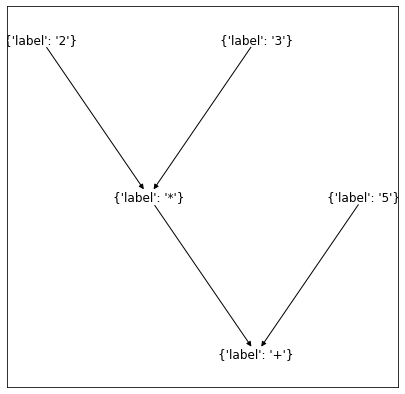

In [7]:

visualize_graph(net_graph,'white')

In [8]:
treet = translate_Tree(tree)
treet

Tree('r', Tree('l', Tree('r', Tree('l', Tree(2), Tree('*')), Tree(3)), Tree('+')), Tree(5))

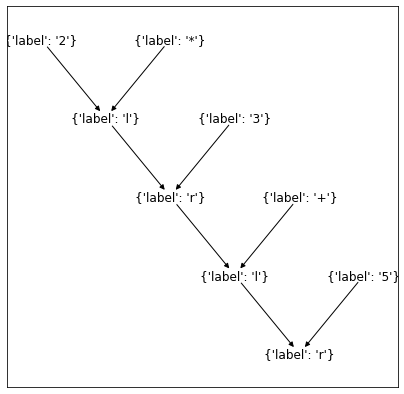

In [9]:
graph = treet.graph()
nodes = graph[0]
adj_mat = graph[1]

net_graph = nx.from_numpy_array(adj_mat,  create_using=nx.DiGraph)
dic_nodes = dict(zip(list(range(treet.adj_dim())), nodes))
nx.set_node_attributes(net_graph,dic_nodes,'label')


visualize_graph(net_graph,'white')

This time we need to encode in N both the leaves values that are numbers, but also those that are connectors. We do it by mapping the connectors to {0,1} and the numbers to n+2 (as 0 and 1 are already taken).

In [ ]:
connectors=['*','+']

In [ ]:
treet.to_array_parse(32,variables, connectors)

left and right correspond to left and right reductions, the only 2 kinds that we have

In [ ]:
max_depth = 4
p=3
variables = list(np.arange(10))
connectors = ['*','+']
net_data = arith_data_gen_parse(variables, connectors, max_depth=4, n_samples =1000)
l = len(net_data)
l_train =round(.8*l)
net_train = net_data[:l_train]
net_val = net_data[l_train:]
data_train = CD_TreeG(net_train, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
data_val = CD_TreeG(net_val, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
train_loader = data_train
val_loader =data_val



In [ ]:
device = torch.device('cuda:2')
class LearnTreeManySoftmax(torch.nn.Module):
    def __init__(self,p,l):        #l is the number of connectors
        super().__init__()
        self.p = p
        self.M = nn.ParameterList([torch.nn.Parameter(data=torch.full((self.p,self.p,self.p),1/self.p)) for i in range(l)])
        self.softmax = nn.Softmax(dim=0)

    def forward(self, tup_tens):
        #tup = deepcopy(tup_tens)
        arr_leaves = tup_tens[0]
        arr_conn = tup_tens[1]
        while torch.sum(1-(arr_leaves[0,:].isnan()*1))!= 1: #loop as long as we have more than one leaf

            #print((1-(arr_leaves[0,:].isnan()*1)))
            last_leaf_id = max((1-(arr_leaves[0,:].isnan()*1)).nonzero())  #just an argmax that returns the max argument...
            #print('lastleafid:',last_leaf_id)
            d = floor(math.log2(last_leaf_id+1))   # get the depth of the leaf
            #print('d',d)
            x = last_leaf_id+2-2**d                   # get the horizontal pos
            #print('x:',x)
            conn_id = int(2**(d-1) + (x/2)-2)           # get the index of the corresponding connector
            #print('conn_id',conn_id)
            left = arr_leaves[:,last_leaf_id-1].squeeze().float()
            right = arr_leaves[:,last_leaf_id].squeeze().float()
            conn = int(arr_conn[conn_id].item())             #used now
            N = self.softmax(self.M[conn])
            prop = torch.einsum('i,uij,j->u',left,N,right) #one step of the propagation
            #print('prop:',prop)
            #print('arr_leaves before update', arr_leaves)
            #print('arr_conn before update', arr_conn)
            arr_leaves[:,last_leaf_id-1] = float('nan')
            arr_leaves[:,last_leaf_id] = float('nan')
            arr_conn[conn_id] = float('nan')
            arr_leaves[:,conn_id] = prop
            #print('arr_leaves after update', arr_leaves)
            #print('arr_conn after update', arr_conn)
        last_leaf_id = max((~arr_leaves[0,:].isnan().long()+2).nonzero())
        #print(self.M)
        return arr_leaves[:,last_leaf_id], self.M

In [ ]:
netsoft1=LearnTreeManySoftmax(3,2).to(device)

def train_clip_many(net, criterion, opti, lr, train_loader, val_loader, epochs,p, device=device):

    best_loss = np.Inf
    best_train_loss = np.Inf
    rl_prec = np.Inf
    best_ep = 1
    nb_iterations = len(train_loader)
    print_every = nb_iterations // 5  # print the training loss 5 times per epoch
    iters = []
    train_losses = []
    val_losses = []
    constraint0 = weightConstraint0(p)
    constraint1 = weightConstraint1(p)

    for ep in range(epochs):

        net.train()
        running_loss = 0.0
        for it, (tup_tens, labels) in enumerate(train_loader):
            opti.zero_grad()
            # Converting to cuda tensors
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)

            # logits from the model
            out = net(tup_tens)
            logits = out[0]

            #param from the model
            M = out[1]
            l=len(M)
            # Computing loss
                        
            loss = criterion(logits.squeeze(-1), labels)    #coef? Other expression? Should we fear negative coef?
            #loss = criterion(logits.squeeze(-1), labels)
            train_losses.append(loss)
            loss.backward()
            net.apply(constraint0)
            net.apply(constraint1)
            opti.step()

            running_loss += loss.item()

            if (it + 1) % print_every == 0:  # Print training loss information
                print()
                print("Iteration {}/{} of epoch {} complete. Loss : {} "
                      .format(it+1, nb_iterations, ep+1, running_loss / print_every))

                #if (val_losses==[]) & (rl_prec>running_loss):
                 #   net_copy = deepcopy(net)
                  #  path_to_model='LearnTree.pt'.format(net.__class__.__name__) #save more often for the server disconnections
                   # torch.save(net_copy.state_dict(), path_to_model)
                    #print("The model has been saved in {}".format(path_to_model))
                rl_prec = running_loss
                running_loss = 0.0

        val_loss = eval_loss(net, device, criterion, val_loader)  # Compute validation loss
        acc = accuracy(net, device, val_loader)
        print()
        print("Epoch {} complete! Validation Loss : {}".format(ep+1, val_loss))
        print("Accuracy : {}".format(acc))
        N0 = nn.Softmax(dim=0)(M[0])
        N1 = nn.Softmax(dim=0)(M[1])
        #print(N0)
        #print(N1)
        val_losses.append(val_loss)
        if val_loss < best_loss:
            print("Best validation loss improved from {} to {}".format(best_loss, val_loss))
            print()
            net_copy = deepcopy(net)  # save a copy of the model
            best_loss = val_loss
            best_ep = ep + 1



def eval_loss(net, device, criterion, dataloader):
    net.eval()

    mean_loss = 0
    count = 0

    with torch.no_grad():
        for it, (tup_tens, labels) in enumerate(dataloader):
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)
            out = net(tup_tens)
            logits = out[0]
            M = out[1]
            mean_loss += criterion(logits.squeeze(-1), labels) 
            count += 1

    return mean_loss / count

def accuracy(net, device, dataloader):
    net.eval()

    right = 0
    count = 0

    with torch.no_grad():
        for it, (tup_tens, labels) in enumerate(dataloader):
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)
            out = net(tup_tens)
            logits = out[0]
            
            pred = torch.argmax(logits)

            right += int(pred==labels)               #number of correct predictions
            count += 1

    return right / count

'''hyp: if some weights come too close to 0... they are 0'''
class weightConstraint0(object):
    def __init__(self,p):
        self.p = p
    
    def __call__(self,module):
        if hasattr(module,'parameters'):
            for param in module.named_parameters():
                w = param[1].data
                if param[1].grad is not None:
                    M = nn.Softmax(dim=0)(w)
                    grad = param[1].grad.data
                    mask = M<1/self.p**2
                    param[1].data = torch.where(mask,-np.inf,w)
                    param[1].grad.data = torch.where(mask,0,grad) 
                    
class weightConstraint1(object):
    def __init__(self,p):
        self.p = p
    
    def __call__(self,module):
        if hasattr(module,'parameters'):
            for param in module.named_parameters():
                w = param[1].data
                if param[1].grad is not None:
                    M = nn.Softmax(dim=0)(w)
                    grad = param[1].grad.data
                    mask = M>1-1/self.p  #when p bigger it seems we can release
                    param[1].data = torch.where(mask,10,w)
                    param[1].grad.data = torch.where(mask,0,grad) 

In [ ]:
netsoft2=LearnTreeManySoftmax(3,2).to(device)
lr=10**(-2)
criterion = CrossEntropyLoss()

#opti = optim.SGD(netsoft1.parameters(), lr=lr)

opti = optim.Adam(netsoft2.parameters(),lr =lr)
epochs=10
train_clip_many(netsoft2, criterion, opti, lr, train_loader, val_loader, epochs,3,device=device)

It gets stuck.. And my intuition is that $M^u$ is not stochastic anymore

#  Make It URN Like

In [ ]:
device = torch.device('cuda:2')

'''p is a natural number and we want to find the $p^3$ matrix that defines a binary fuction/relation'''
from torch.nn import Embedding
class LearnTreeURN_many(torch.nn.Module):
    def __init__(self,p,l):
        super().__init__()
        self.p = p
        self.l = l
        self.dim_emb = int(p*(p-1)/2)
        self.preM = nn.ParameterList([torch.nn.Parameter(data=torch.full((self.dim_emb,self.p),1/self.p)) for i in range(l)])
         # what better initialization?

         # for creating the upper tringulars
        self.ix_mat = torch.zeros(p,p).long()
        for i in range(0,p):
            for j in range(i+1,p):
                self.ix_mat[i,j] = (i* (2*p - i - 3))//2 + j - 1 + 1



    def forward(self, tup_tens):
        #tup = deepcopy(tup_tens)
        arr_leaves = tup_tens[0]
        arr_conn = tup_tens[1]
        
        U=[]
        for j in range(self.l):
            list_ortho = []
            mat = self.preM[j]
            for i in range(self.p):
                x = mat[:,i]
                #print(x.shape)
                x = torch.cat([torch.zeros(x.shape[:-1]).to(device).unsqueeze(-1), x], dim=-1)
                tri = torch.index_select(x, -1, self.ix_mat.flatten().to(device)).reshape([self.p,self.p])
                tri = tri - tri.transpose(-2, -1)
                exp_mat = torch.matrix_exp(tri)
                list_ortho.append(exp_mat)
            O = torch.stack(list_ortho)  #first we create the ortho mat corresponding to M
            #if j == 0:
             #   O = torch.transpose(O,0,1)   # we need to have distributions along dim0
            if j == 1:
                O = torch.transpose(O,0,2)
            U.append(O)
        while torch.sum(1-(arr_leaves[0,:].isnan()*1))!= 1: #loop as long as we have more than one leaf

            #print((1-(arr_leaves[0,:].isnan()*1)))
            last_leaf_id = max((1-(arr_leaves[0,:].isnan()*1)).nonzero())  #just an argmax that returns the max argument...
            #print('lastleafid:',last_leaf_id)
            d = floor(math.log2(last_leaf_id+1))   # get the depth of the leaf
            #print('d',d)
            x = last_leaf_id+2-2**d                   # get the horizontal pos
            #print('x:',x)
            conn_id = int(2**(d-1) + (x/2)-2)           # get the index of the corresponding connector
            #print('conn_id',conn_id)
            left = arr_leaves[:,last_leaf_id-1].squeeze().float()
            right = arr_leaves[:,last_leaf_id].squeeze().float()
            conn = int(arr_conn[conn_id].item())             #used when several connectors
            M = U[conn]
            
            prop = torch.einsum('i,uij,j->u',left,M,right) #one step of the propagation
            #print('arr_leaves before update', arr_leaves)
            #print('arr_conn before update', arr_conn)
            arr_leaves[:,last_leaf_id-1] = float('nan')
            arr_leaves[:,last_leaf_id] = float('nan')
            arr_conn[conn_id] = float('nan')
            arr_leaves[:,conn_id] = prop
            #print('arr_leaves after update', arr_leaves)
            #print('arr_conn after update', arr_conn)
        last_leaf_id = max((~arr_leaves[0,:].isnan().long()+2).nonzero())
        #print(M)
        return arr_leaves[:,last_leaf_id], M




def train(net, criterion, opti, lr, train_loader, val_loader, epochs,device=device):

    best_loss = np.Inf
    best_train_loss = np.Inf
    rl_prec = np.Inf
    best_ep = 1
    nb_iterations = len(train_loader)
    print_every = nb_iterations // 5  # print the training loss 5 times per epoch
    iters = []
    train_losses = []
    val_losses = []


    for ep in range(epochs):

        net.train()
        running_loss = 0.0
        for it, (tup_tens, labels) in enumerate(train_loader):
            opti.zero_grad()
            # Converting to cuda tensors
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)

            # logits from the model
            out = net(tup_tens)
            logits = out[0]

            #param from the model
            #M = out[1]

            # Computing loss

            loss = criterion(logits.squeeze(-1), labels)    #better!
            train_losses.append(loss)
            loss.backward()
            opti.step()
            running_loss += loss.item()

            if (it + 1) % print_every == 0:  # Print training loss information
                print()
                print("Iteration {}/{} of epoch {} complete. Loss : {} "
                      .format(it+1, nb_iterations, ep+1, running_loss / print_every))

                
                rl_prec = running_loss
                running_loss = 0.0


        val_loss = eval_loss(net, device, criterion, val_loader)  # Compute validation loss
        acc = accuracy(net, device, val_loader)
        print()
        print("Epoch {} complete! Validation Loss : {}".format(ep+1, val_loss))
        print("Accuracy : {}".format(acc))
        val_losses.append(val_loss)
        if val_loss < best_loss:
            print("Best validation loss improved from {} to {}".format(best_loss, val_loss))
            best_loss = val_loss
            best_ep = ep + 1


    

def eval_loss(net, device, criterion, dataloader):
    net.eval()

    mean_loss = 0
    count = 0

    with torch.no_grad():
        for it, (tup_tens, labels) in enumerate(dataloader):
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)
            out = net(tup_tens)
            logits = out[0]
            #M = out[1]
            mean_loss += criterion(logits.squeeze(-1), labels) 
            count += 1

    return mean_loss / count

def accuracy(net, device, dataloader):
    net.eval()

    right = 0
    count = 0

    with torch.no_grad():
        for it, (tup_tens, labels) in enumerate(dataloader):
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)
            out = net(tup_tens)
            logits = out[0]
            #M = out[1].detach()
            pred = torch.argmax(logits)

            right += int(pred==labels)               #number of correct predictions
            count += 1

    return right / count

In [ ]:
neturn2=LearnTreeURN_many(3,2).to(device)
lr=10**(-2)
criterion = CrossEntropyLoss()

#opti = optim.SGD(netsoft1.parameters(), lr=lr)

opti = optim.Adam(neturn2.parameters(),lr =lr)
epochs=10
train(neturn2, criterion, opti, lr, train_loader, val_loader, epochs,device=device)

The rules are not learned

In [ ]:
#this one tries to learn an ortho mat for + and a stochastic for *

from torch.nn import Embedding
class LearnTreehalfURN_many(torch.nn.Module):
    def __init__(self,p,l):
        super().__init__()
        self.p = p
        self.l = l
        self.dim_emb = int(p*(p-1)/2)
        self.preO = torch.nn.Parameter(data=torch.full((self.dim_emb,self.p),1/self.p)) 
        self.M = torch.nn.Parameter(data=torch.full((self.p,self.p,self.p),1/self.p)) 
        self.softmax = nn.Softmax(dim=0)

         # for creating the upper tringulars
        self.ix_mat = torch.zeros(p,p).long()
        for i in range(0,p):
            for j in range(i+1,p):
                self.ix_mat[i,j] = (i* (2*p - i - 3))//2 + j - 1 + 1



    def forward(self, tup_tens):
        #tup = deepcopy(tup_tens)
        arr_leaves = tup_tens[0]
        arr_conn = tup_tens[1]
        list_ortho =[]
       
        for i in range(self.p):
            x = self.preO[:,i]
            #print(x.shape)
            x = torch.cat([torch.zeros(x.shape[:-1]).to(device).unsqueeze(-1), x], dim=-1)
            tri = torch.index_select(x, -1, self.ix_mat.flatten().to(device)).reshape([self.p,self.p])
            tri = tri - tri.transpose(-2, -1)
            exp_mat = torch.matrix_exp(tri)
            list_ortho.append(exp_mat)
        O = torch.stack(list_ortho)  #first we create the ortho mat corresponding to M
        O = torch.transpose(O,0,2)
        
        while torch.sum(1-(arr_leaves[0,:].isnan()*1))!= 1: #loop as long as we have more than one leaf

            #print((1-(arr_leaves[0,:].isnan()*1)))
            last_leaf_id = max((1-(arr_leaves[0,:].isnan()*1)).nonzero())  #just an argmax that returns the max argument...
            #print('lastleafid:',last_leaf_id)
            d = floor(math.log2(last_leaf_id+1))   # get the depth of the leaf
            #print('d',d)
            x = last_leaf_id+2-2**d                   # get the horizontal pos
            #print('x:',x)
            conn_id = int(2**(d-1) + (x/2)-2)           # get the index of the corresponding connector
            #print('conn_id',conn_id)
            left = arr_leaves[:,last_leaf_id-1].squeeze().float()
            right = arr_leaves[:,last_leaf_id].squeeze().float()
            conn = int(arr_conn[conn_id].item())             #used when several connectors
            if conn == 0 :
                N = O
            if conn == 1 :
                N = self.softmax(self.M)
            prop = torch.einsum('i,uij,j->u',left,N,right) #one step of the propagation
            #print('arr_leaves before update', arr_leaves)
            #print('arr_conn before update', arr_conn)
            arr_leaves[:,last_leaf_id-1] = float('nan')
            arr_leaves[:,last_leaf_id] = float('nan')
            arr_conn[conn_id] = float('nan')
            arr_leaves[:,conn_id] = prop
            #print('arr_leaves after update', arr_leaves)
            #print('arr_conn after update', arr_conn)
        last_leaf_id = max((~arr_leaves[0,:].isnan().long()+2).nonzero())
        #print(M)
        return arr_leaves[:,last_leaf_id], N


In [ ]:
neturn3=LearnTreehalfURN_many(3,2).to(device)
lr=10**(-2)
criterion = CrossEntropyLoss()

#opti = optim.SGD(netsoft1.parameters(), lr=lr)

opti = optim.Adam(neturn3.parameters(),lr =lr)
epochs=10
train(neturn3, criterion, opti, lr, train_loader, val_loader, epochs,device=device)

In [ ]:
from torch.nn import Embedding
class LearnTreehalfURN_many(torch.nn.Module):
    def __init__(self,p,l):
        super().__init__()
        self.p = p
        self.l = l
        self.dim_emb = int(p*(p-1)/2)
        self.preO = torch.nn.Parameter(data=torch.full((self.dim_emb,self.p),1/self.p)) 
        self.M = torch.nn.Parameter(data=torch.full((self.p,self.p,self.p),1/self.p)) 
        self.softmax = nn.Softmax(dim=0)

         # for creating the upper tringulars
        self.ix_mat = torch.zeros(p,p).long()
        for i in range(0,p):
            for j in range(i+1,p):
                self.ix_mat[i,j] = (i* (2*p - i - 3))//2 + j - 1 + 1



    def forward(self, tup_tens):
        #tup = deepcopy(tup_tens)
        arr_leaves = tup_tens[0]
        arr_conn = tup_tens[1]
        list_ortho =[]
       
        for i in range(self.p):
            x = self.preO[:,i]
            #print(x.shape)
            x = torch.cat([torch.zeros(x.shape[:-1]).to(device).unsqueeze(-1), x], dim=-1)
            tri = torch.index_select(x, -1, self.ix_mat.flatten().to(device)).reshape([self.p,self.p])
            tri = tri - tri.transpose(-2, -1)
            exp_mat = torch.matrix_exp(tri)
            list_ortho.append(exp_mat)
        O = torch.stack(list_ortho)  #first we create the ortho mat corresponding to M
        O = torch.transpose(O,0,2)
        
        while torch.sum(1-(arr_leaves[0,:].isnan()*1))!= 1: #loop as long as we have more than one leaf

            #print((1-(arr_leaves[0,:].isnan()*1)))
            last_leaf_id = max((1-(arr_leaves[0,:].isnan()*1)).nonzero())  #just an argmax that returns the max argument...
            #print('lastleafid:',last_leaf_id)
            d = floor(math.log2(last_leaf_id+1))   # get the depth of the leaf
            #print('d',d)
            x = last_leaf_id+2-2**d                   # get the horizontal pos
            #print('x:',x)
            conn_id = int(2**(d-1) + (x/2)-2)           # get the index of the corresponding connector
            #print('conn_id',conn_id)
            left = arr_leaves[:,last_leaf_id-1].squeeze().float()
            right = arr_leaves[:,last_leaf_id].squeeze().float()
            conn = int(arr_conn[conn_id].item())             #used when several connectors
            if conn == 0 :
                N = O
            if conn == 1 :
                N = self.softmax(self.M)
            prop = torch.einsum('i,uij,j->u',left,N,right) #one step of the propagation
            #print('arr_leaves before update', arr_leaves)
            #print('arr_conn before update', arr_conn)
            arr_leaves[:,last_leaf_id-1] = float('nan')
            arr_leaves[:,last_leaf_id] = float('nan')
            arr_conn[conn_id] = float('nan')
            arr_leaves[:,conn_id] = prop
            #print('arr_leaves after update', arr_leaves)
            #print('arr_conn after update', arr_conn)
        last_leaf_id = max((~arr_leaves[0,:].isnan().long()+2).nonzero())
        #print(M)
        return arr_leaves[:,last_leaf_id], N


# A mixture of ortho and degenerate

Learn matrices of rank 1 (generated by 1 vector $\ket{v}\bra{v}$) and orthogonal matrices

In [ ]:
device = torch.device('cuda:2')

'''p is a natural number and we want to find the $p^3$ matrix that defines a binary fuction/relation'''
from torch.nn import Embedding
class LearnParse(torch.nn.Module):
    def __init__(self,p,l):
        super().__init__()
        self.p = p
        self.l = l
        self.dim_emb = int(p*(p-1)/2)
        self.preM = nn.ParameterList([torch.nn.Parameter(data=torch.full((self.dim_emb,self.p),1/self.p)) for i in range(l)])
        self.Degen = nn.ParameterList([torch.nn.Parameter(data=torch.full((self.p,self.p),1/self.p)) for i in range(l)]) #to learn the pos of the column vector
        self.u = nn.ParameterList([torch.nn.Parameter(data=torch.full((self.p,self.p),1/self.p)) for i in range(l)]) #to learn the unitary vectors
         
         # for creating the upper tringulars
        self.ix_mat = torch.zeros(p,p).long()
        for i in range(0,p):
            for j in range(i+1,p):
                self.ix_mat[i,j] = (i* (2*p - i - 3))//2 + j - 1 + 1

        list_lin = [nn.Linear(p,1) for i in range(l)]    #One for each connector
        self.list_linear = nn.ModuleList(list_lin)       #the attention layer
        self.softmax = nn.Softmax(dim=0)
        

    def forward(self, tup_tens):
        #tup = deepcopy(tup_tens)
        arr_leaves = tup_tens[0]
        arr_conn = tup_tens[1]
        
        U=[]
        D=[]
        for j in range(self.l):
            list_ortho = []
            mat = self.preM[j]
            list_degen =[]
            vec = self.Degen[j]
            uni = self.u[j]
            
            
            for i in range(self.p):
                x = mat[:,i]
                #print(x.shape)
                x = torch.cat([torch.zeros(x.shape[:-1]).to(device).unsqueeze(-1), x], dim=-1)
                tri = torch.index_select(x, -1, self.ix_mat.flatten().to(device)).reshape([self.p,self.p])
                tri = tri - tri.transpose(-2, -1)
                exp_mat = torch.matrix_exp(tri)
                list_ortho.append(exp_mat)
                
                v = vec[i,:].unsqueeze(0)
                u = self.softmax(uni[i,:]).unsqueeze(1)
                deg_mat = u@v   #a column of norm one
                list_degen.append(deg_mat)
                #print("list_degen:",list_degen)
            O = torch.stack(list_ortho)  #first we create the ortho mat corresponding to M
            O = torch.transpose(O,0,2)
            U.append(O)
            #print("U:",U)
            G = torch.stack(list_degen)
            G = torch.transpose(G,0,2)
            D.append(G) 
            
            
        while torch.sum(1-(arr_leaves[0,:].isnan()*1))!= 1: #loop as long as we have more than one leaf

            #print((1-(arr_leaves[0,:].isnan()*1)))
            last_leaf_id = max((1-(arr_leaves[0,:].isnan()*1)).nonzero())  #just an argmax that returns the max argument...
            #print('lastleafid:',last_leaf_id)
            d = floor(math.log2(last_leaf_id+1))   # get the depth of the leaf
            #print('d',d)
            x = last_leaf_id+2-2**d                   # get the horizontal pos
            #print('x:',x)
            conn_id = int(2**(d-1) + (x/2)-2)           # get the index of the corresponding connector
            #print('conn_id',conn_id)
            left = arr_leaves[:,last_leaf_id-1].squeeze().float()
            right = arr_leaves[:,last_leaf_id].squeeze().float()
            conn = int(arr_conn[conn_id].item())             #used when several connectors
            M = U[conn]
            N = D[conn]
            linear = self.list_linear[conn]
            t = linear(left)
            t = torch.sigmoid(t)
            #print('t',t)
            prop1 = torch.einsum('i,uij,j->u',left,M,right) #one step of the propagation
            prop2 = torch.einsum('i,uij,j->u',left,N,right)
            prop = t*prop1 + (1-t)*prop2  #t is a function of conn and of left in [0,1]. Hopefully values of 0 and 1 will quickly be reached
            #print('arr_leaves before update', arr_leaves)
            #print('arr_conn before update', arr_conn)
            arr_leaves[:,last_leaf_id-1] = float('nan')
            arr_leaves[:,last_leaf_id] = float('nan')
            arr_conn[conn_id] = float('nan')
            arr_leaves[:,conn_id] = prop
            #print('arr_leaves after update', arr_leaves)
            #print('arr_conn after update', arr_conn)
        last_leaf_id = max((~arr_leaves[0,:].isnan().long()+2).nonzero())
        #print(M)
        return arr_leaves[:,last_leaf_id], M

#Les problemes possibles:
#1 confusion dans les dimensions transposees
#2 la couche d'attention: est-ce assez d'avoir une fonction lineaire en x (on veut apprendre une fonction qui retourne (1,0) pour certaines valeurs de x (0,1) pour d'autres
#3 Les clips functions devraient etre modifiees pour clipper t!
#4 Est ce que nos matrices ortho definies comme $exp(T-T^t)$ where T are reel triangular sup can reach all permutations ? (JP 
#disait, je crois, que non... Pourtant...)


def train(net, criterion, opti, lr, train_loader, val_loader, epochs,device=device):

    best_loss = np.Inf
    best_train_loss = np.Inf
    rl_prec = np.Inf
    best_ep = 1
    nb_iterations = len(train_loader)
    print_every = nb_iterations // 5  # print the training loss 5 times per epoch
    iters = []
    train_losses = []
    val_losses = []


    for ep in range(epochs):

        net.train()
        running_loss = 0.0
        for it, (tup_tens, labels) in enumerate(train_loader):
            opti.zero_grad()
            # Converting to cuda tensors
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)

            # logits from the model
            out = net(tup_tens)
            logits = out[0]

            #param from the model
            #M = out[1]

            # Computing loss

            loss = criterion(logits.squeeze(-1), labels)    #better!
            train_losses.append(loss)
            loss.backward()
            opti.step()
            running_loss += loss.item()

            if (it + 1) % print_every == 0:  # Print training loss information
                print()
                print("Iteration {}/{} of epoch {} complete. Loss : {} "
                      .format(it+1, nb_iterations, ep+1, running_loss / print_every))

                
                rl_prec = running_loss
                running_loss = 0.0


        val_loss = eval_loss(net, device, criterion, val_loader)  # Compute validation loss
        acc = accuracy(net, device, val_loader)
        print()
        print("Epoch {} complete! Validation Loss : {}".format(ep+1, val_loss))
        print("Accuracy : {}".format(acc))
        val_losses.append(val_loss)
        if val_loss < best_loss:
            print("Best validation loss improved from {} to {}".format(best_loss, val_loss))
            best_loss = val_loss
            best_ep = ep + 1


    

def eval_loss(net, device, criterion, dataloader):
    net.eval()

    mean_loss = 0
    count = 0

    with torch.no_grad():
        for it, (tup_tens, labels) in enumerate(dataloader):
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)
            out = net(tup_tens)
            logits = out[0]
            #M = out[1]
            mean_loss += criterion(logits.squeeze(-1), labels) 
            count += 1

    return mean_loss / count

def accuracy(net, device, dataloader):
    net.eval()

    right = 0
    count = 0

    with torch.no_grad():
        for it, (tup_tens, labels) in enumerate(dataloader):
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)
            out = net(tup_tens)
            logits = out[0]
            #M = out[1].detach()
            pred = torch.argmax(logits)

            right += int(pred==labels)               #number of correct predictions
            count += 1

    return right / count

In [ ]:
max_depth = 4
p=3
variables = list(np.arange(10))
connectors = ['*','+']
net_data = arith_data_gen_parse(variables, connectors, max_depth=4, n_samples =1000)
l = len(net_data)
l_train =round(.8*l)
net_train = net_data[:l_train]
net_val = net_data[l_train:]
data_train = CD_TreeG(net_train, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
data_val = CD_TreeG(net_val, max_depth, transform = One_Hot_Zp(p), target_transform = target_Zp(p))
train_loader = data_train
val_loader =data_val


Still not here

# 4 dims for certains connectors

In [ ]:
max_depth = 4
p=3
variables = list(np.arange(10))
connectors = ['*','+']
net_data = arith_data_gen_parse(variables, connectors, max_depth=4, n_samples =1000)
l = len(net_data)
l_train =round(.8*l)
net_train = net_data[:l_train]
net_val = net_data[l_train:]
data_train = CD_TreeG(net_train, max_depth, transform = One_Hot_Zp(p), target_transform = mod_target_Zp(p,connectors))
data_val = CD_TreeG(net_val, max_depth, transform = One_Hot_Zp(p), target_transform = mod_target_Zp(p,connectors))
train_loader = data_train
val_loader =data_val

In [ ]:
data_train[11][0][0].unsqueeze(-1).repeat(1,1,3).size()

In [ ]:
device = torch.device('cuda:2')
class LearnTreeManySoftmax(torch.nn.Module):
    def __init__(self,p,l):        #l is the number of connectors
        super().__init__()
        self.p = p
        self.Ml =torch.nn.Parameter(data=torch.full((self.p,self.p,self.p,self.p),1/self.p))
        self.softmax = nn.Softmax(dim=1)

    def forward(self, tup_tens):
        #tup = deepcopy(tup_tens)
        arr_leaves = tup_tens[0]
        arr_leaves = arr_leaves.unsqueeze(-1).repeat(1,1,self.p)
        #print(arr_leaves.size())
        arr_conn = tup_tens[1]
        while torch.sum(1-(arr_leaves[0,:,0].isnan()*1))!= 1: #loop as long as we have more than one leaf

            #print((1-(arr_leaves[0,:].isnan()*1)))
            last_leaf_id = max((1-(arr_leaves[0,:,0].isnan()*1)).nonzero())  #just an argmax that returns the max argument...
            #print('lastleafid:',last_leaf_id)
            d = floor(math.log2(last_leaf_id+1))   # get the depth of the leaf
            #print('d',d)
            x = last_leaf_id+2-2**d                   # get the horizontal pos
            #print('x:',x)
            conn_id = int(2**(d-1) + (x/2)-2)           # get the index of the corresponding connector
            #print('conn_id',conn_id)
            left = arr_leaves[:,last_leaf_id-1,:].float()
            #print('left before comp',left.size())
            right = arr_leaves[:,last_leaf_id,:].float()
            conn = int(arr_conn[conn_id].item())             #used now
            if conn==0:
                
                N = self.softmax(self.Ml)
                left = left[:,:,0].squeeze()
                right = right[:,:,0].squeeze()
                #print(left.size())
                prop = torch.einsum('i,vuij,j->vu',left,N,right) #one step of the propagation
            else :
                right = right[:,:,0].squeeze()
                prop = left@right
                prop = prop.repeat(1,1,self.p)
            #print('prop:',prop)
            #print('arr_leaves before update', arr_leaves)
            #print('arr_conn before update', arr_conn)
            arr_leaves[:,last_leaf_id-1,:] = float('nan')
            arr_leaves[:,last_leaf_id,:] = float('nan')
            arr_conn[conn_id] = float('nan')
            arr_leaves[:,conn_id,:] = prop
            #print('arr_leaves after update', arr_leaves)
            #print('arr_conn after update', arr_conn)
        last_leaf_id = max((~arr_leaves[0,:,0].isnan().long()+2).nonzero())
        #print(self.M)
        return arr_leaves[:,last_leaf_id,0],self.Ml

netsoft1=LearnTreeManySoftmax(3,2).to(device)

def train_clip_many(net, criterion, opti, lr, train_loader, val_loader, epochs,p, device=device):

    best_loss = np.Inf
    best_train_loss = np.Inf
    rl_prec = np.Inf
    best_ep = 1
    nb_iterations = len(train_loader)
    print_every = nb_iterations // 5  # print the training loss 5 times per epoch
    iters = []
    train_losses = []
    val_losses = []
    constraint0 = weightConstraint0(p)
    constraint1 = weightConstraint1(p)

    for ep in range(epochs):

        net.train()
        running_loss = 0.0
        for it, (tup_tens, labels) in enumerate(train_loader):
            opti.zero_grad()
            # Converting to cuda tensors
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)

            # logits from the model
            out = net(tup_tens)
            logits = out[0]

            #param from the model
            M = out[1]
            l=len(M)
            # Computing loss
                        
            loss = criterion(logits.squeeze(-1), labels)    #coef? Other expression? Should we fear negative coef?
            #loss = criterion(logits.squeeze(-1), labels)
            train_losses.append(loss)
            loss.backward()
            net.apply(constraint0)
            net.apply(constraint1)
            opti.step()

            running_loss += loss.item()

            if (it + 1) % print_every == 0:  # Print training loss information
                print()
                print("Iteration {}/{} of epoch {} complete. Loss : {} "
                      .format(it+1, nb_iterations, ep+1, running_loss / print_every))

                #if (val_losses==[]) & (rl_prec>running_loss):
                 #   net_copy = deepcopy(net)
                  #  path_to_model='LearnTree.pt'.format(net.__class__.__name__) #save more often for the server disconnections
                   # torch.save(net_copy.state_dict(), path_to_model)
                    #print("The model has been saved in {}".format(path_to_model))
                rl_prec = running_loss
                running_loss = 0.0

        val_loss = eval_loss(net, device, criterion, val_loader)  # Compute validation loss
        acc = accuracy(net, device, val_loader)
        print()
        print("Epoch {} complete! Validation Loss : {}".format(ep+1, val_loss))
        print("Accuracy : {}".format(acc))
        N0 = nn.Softmax(dim=0)(M[0])
        N1 = nn.Softmax(dim=0)(M[1])
        #print(N0)
        #print(N1)
        val_losses.append(val_loss)
        if val_loss < best_loss:
            print("Best validation loss improved from {} to {}".format(best_loss, val_loss))
            print()
            net_copy = deepcopy(net)  # save a copy of the model
            best_loss = val_loss
            best_ep = ep + 1



def eval_loss(net, device, criterion, dataloader):
    net.eval()

    mean_loss = 0
    count = 0

    with torch.no_grad():
        for it, (tup_tens, labels) in enumerate(dataloader):
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)
            out = net(tup_tens)
            logits = out[0]
            M = out[1]
            mean_loss += criterion(logits.squeeze(-1), labels) 
            count += 1

    return mean_loss / count

def accuracy(net, device, dataloader):
    net.eval()

    right = 0
    count = 0

    with torch.no_grad():
        for it, (tup_tens, labels) in enumerate(dataloader):
            tup_tens, labels = (tup_tens[0].to(device), tup_tens[1].to(device)), labels.to(device)
            out = net(tup_tens)
            logits = out[0]
            
            pred = torch.argmax(logits)

            right += int(pred==labels)               #number of correct predictions
            count += 1

    return right / count

'''hyp: if some weights come too close to 0... they are 0'''
class weightConstraint0(object):
    def __init__(self,p):
        self.p = p
    
    def __call__(self,module):
        if hasattr(module,'parameters'):
            for param in module.named_parameters():
                w = param[1].data
                if param[1].grad is not None:
                    M = nn.Softmax(dim=1)(w)
                    grad = param[1].grad.data
                    mask = M<1/self.p**2
                    param[1].data = torch.where(mask,-np.inf,w)
                    param[1].grad.data = torch.where(mask,0,grad) 
                    
class weightConstraint1(object):
    def __init__(self,p):
        self.p = p
    
    def __call__(self,module):
        if hasattr(module,'parameters'):
            for param in module.named_parameters():
                w = param[1].data
                if param[1].grad is not None:
                    M = nn.Softmax(dim=1)(w)
                    grad = param[1].grad.data
                    mask = M>1-1/self.p  #when p bigger it seems we can release
                    param[1].data = torch.where(mask,10,w)
                    param[1].grad.data = torch.where(mask,0,grad) 

netsoft2=LearnTreeManySoftmax(3,2).to(device)
lr=10**(-2)
criterion = CrossEntropyLoss()

#opti = optim.SGD(netsoft1.parameters(), lr=lr)

opti = optim.Adam(netsoft2.parameters(),lr =lr)
epochs=10
train_clip_many(netsoft2, criterion, opti, lr, train_loader, val_loader, epochs,3,device=device)